# Outlier Analysis

### Defination 
1. It is an Extreme Value --High or Low 
2. The Values /data points which are significantly different from others.
3. The data points which are away from the data distribution .
4. The data point which are out of range 
-- Example
Sure, here are examples for each of the points you mentioned:

1. **Extreme Value - High or Low**: An example of an extreme high outlier could be an individual's income significantly higher than the average income in a particular region, like a CEO's salary in a small town. Conversely, an extreme low outlier could be an unusually low temperature recorded in a typically warm climate, like a freezing day in a tropical area.

2. **Values/Data Points Significantly Different from Others**: In a dataset of employee salaries, most salaries might cluster around a certain range based on job roles and experience levels. However, if there's a data point representing an astronomically high salary compared to others in the same position and experience level, it would be considered a significant outlier.

3. **Data Points Away from Data Distribution**: Imagine a dataset representing housing prices in a city. Most prices might follow a normal distribution, with the majority falling within a certain range. However, if there's a data point representing a house price significantly higher or lower than the majority, it would be considered an outlier.

4. **Data Points Out of Range**: Consider a dataset of students' ages in a classroom. If most students are between the ages of 5 and 6, but there's a data point representing a student who is 25 years old, that would be an outlier as it falls far outside the expected range for the dataset.

### Impact of Ouliers
1. It influences the statistical measures.
2. Outliers influences the machine learning modules.

### Reason for Outliers (Use canva For Flow Chart)
1. Data Entry Error/Human Error
2. Measurment Error
3. Instrument Error 
4. Rare Event 

-- Example Here are easy examples with sample data for each reason:

1. **Data Entry Error/Human Error**: Suppose you have a dataset recording the heights of students in a classroom. Due to a data entry error, instead of recording heights in centimeters, one student's height is entered as 500 centimeters instead of 150 centimeters. This erroneous entry significantly skews the data and creates an outlier.

   Sample data: {120, 125, 130, 135, 140, 145, 500, 150, 155}

2. **Measurement Error**: Consider a dataset representing the weights of apples picked from an orchard. Due to a malfunctioning scale, one apple's weight is measured as 10 kilograms instead of 1 kilogram. This measurement error introduces an outlier into the dataset.

   Sample data: {0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 10.0, 1.1, 1.2}

3. **Instrument Error**: Imagine you have a dataset recording the temperature readings in a greenhouse. However, one of the thermometers used in the greenhouse is faulty, consistently reporting temperatures that are higher than the actual temperature. This instrument error leads to artificially high temperature readings, creating outliers in the dataset.

   Sample data: {22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 350, 25.5, 26.0}

4. **Rare Event**: Suppose you have a dataset representing the number of car accidents per day in a city. Most days, the number of accidents ranges from 5 to 10. However, on one particular day, there was a major snowstorm that caused road closures and significantly reduced traffic, resulting in only 1 accident. This rare event of unusually low accident occurrence creates an outlier in the dataset.

   Sample data: {8, 7, 9, 6, 10, 1, 9, 8, 7}

### Identification of Outliers(Flow Chart Use )
1. Statistical Technique 
   - IQR Method 
   - Z - Score 
2. Visualization Method 
   - Box Plot (Uni Variate) 
   - Scatter Plot (Bi variate)
3. Domain Knowledge 
4. Hypothesis Testing

In [1]:
import numpy as np 
import pandas as pd

# Outlier Analysis 

In [2]:
df =pd.read_csv(r"C:\Users\91771\Desktop\Innomatic\EDA\Pandas\Datasets\BoxPlot_IQR_Data.csv")
df

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
...,...
99,47.654129
100,100.000000
101,110.000000
102,5.000000


## Identifying Outlier

### IQR Method

In [3]:
Q1 =df['Values'].quantile(0.25)
Q3 =df['Values'].quantile(0.75)
IQR = Q3 - Q1
Lower = max(df['Values'].min(),Q1 - 1.5*IQR)
Upper = min(df['Values'].max(),Q3 + 1.5*IQR)

In [5]:
Lower,Upper

(27.17321545886533, 71.70971029326903)

In [6]:
# Outliers on Data Set
df[(df['Values'] < Lower ) | (df['Values'] > Upper)]

,Values
74,23.802549
100,100.000000
101,110.000000
102,5.000000
103,0.000000


In [7]:
# Creating a Function for IQR method to identifying the Outliers
def Outlier(Column):
    Q1 = df[Column].quantile(0.25)
    Q3 = df[Column].quantile(0.75)
    IQR = Q3 - Q1
    Lower = max( df[Column].min(), Q1 - 1.5 * IQR)
    Upper = min( df[Column].max(), Q3 + 1.5 * IQR)
    return df[(df[Column] < Lower) |  (df[Column] > Upper)] 

In [8]:
Outlier('Values')

,Values
74,23.802549
100,100.000000
101,110.000000
102,5.000000
103,0.000000


### Z Score Method (Standarization)

In [8]:
mean = df["Values"].mean()
std  = df['Values'].std()

In [9]:
def Z_score(x):
    n = (x - mean) / std
    return n

In [10]:
df['Z Score'] = Z_score(df['Values'])

In [11]:
df

,Values,Z Score
0,54.967142,0.430640
1,48.617357,-0.039085
2,56.476885,0.542323
3,65.230299,1.189855
4,47.658466,-0.110018
...,...,...
99,47.654129,-0.110339
100,100.000000,3.761937
101,110.000000,4.501685
102,5.000000,-3.265670


In [12]:
df[(df['Z Score'] < -3 ) | (df['Z Score'] > +3)]

,Values,Z Score
100,100.0,3.761937
101,110.0,4.501685
102,5.0,-3.265670
103,0.0,-3.635544


### Visualization Method 

<AxesSubplot:>

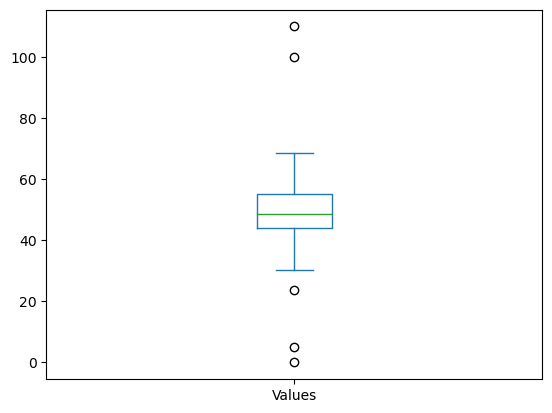

In [13]:
df['Values'].plot(kind= 'box')

### Domain Knowledge

In [12]:
df = pd.DataFrame({"Marks": [23,45,67,89,76,45]})
df

,Marks
0,23
1,45
2,67
3,89
4,76
5,45


In [13]:
Outlier('Marks')

,Marks
